<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-3-_part_a_b_c.ipynb/blob/main/Jocelyn_Baduria_Assignment_3_part_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B2. Pytorch
With auto differentiation primitive

In [98]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [99]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [100]:
!pip3 install torch torchvision

In [101]:
import torch
import torch.nn as nn
import numpy as np

1. Generate data:

In [102]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons

n_samples = 200
d = 3

x = torch.FloatTensor(n_samples, d).uniform_(-1,1)

weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.5, 0.25])

# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = torch.mm(x ** 2, weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
#x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


2. Train the 3dim and 2output generated data using Pytorch

In [103]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(19.8726, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([200, 2])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


3. Test just one forward and backward step

In [104]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(19.8726, grad_fn=<MseLossBackward>)
tensor(15.3963, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([200, 2])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


4. Add ReLu function to learn the non-linear data, we need non-linearities in our model.

In [105]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


5. Fit the model and compute the cost function using Pytorch


In [106]:
# Now we run the training loop
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)

tensor(15.3963, grad_fn=<MseLossBackward>)
tensor(12.6493, grad_fn=<MseLossBackward>)
tensor(10.5233, grad_fn=<MseLossBackward>)
tensor(8.7342, grad_fn=<MseLossBackward>)
tensor(7.3042, grad_fn=<MseLossBackward>)
tensor(6.2666, grad_fn=<MseLossBackward>)
tensor(5.4877, grad_fn=<MseLossBackward>)
tensor(4.8757, grad_fn=<MseLossBackward>)
tensor(4.4041, grad_fn=<MseLossBackward>)
tensor(4.0387, grad_fn=<MseLossBackward>)
tensor(3.7553, grad_fn=<MseLossBackward>)
tensor(3.5485, grad_fn=<MseLossBackward>)
tensor(3.3941, grad_fn=<MseLossBackward>)
tensor(3.2778, grad_fn=<MseLossBackward>)
tensor(3.1911, grad_fn=<MseLossBackward>)
tensor(3.1245, grad_fn=<MseLossBackward>)
tensor(3.0717, grad_fn=<MseLossBackward>)
tensor(3.0293, grad_fn=<MseLossBackward>)
tensor(2.9928, grad_fn=<MseLossBackward>)
tensor(2.9600, grad_fn=<MseLossBackward>)
tensor(2.9278, grad_fn=<MseLossBackward>)
tensor(2.8972, grad_fn=<MseLossBackward>)
tensor(2.8681, grad_fn=<MseLossBackward>)
tensor(2.8397, grad_fn=<MseLoss

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([200, 2])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


6. Plot the output post training as well as the real data  using tsne. Result: Similar plots but different values

In [109]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

view = TSNE(n_components=2, perplexity=50,learning_rate=200,random_state=123).fit_transform(x, y_pred_tensor)
view.shape

def plot_tsne(x, y_true_tensor, y_pred_tensor):
  plt.figure(figsize=(10,5))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  plt.legend()

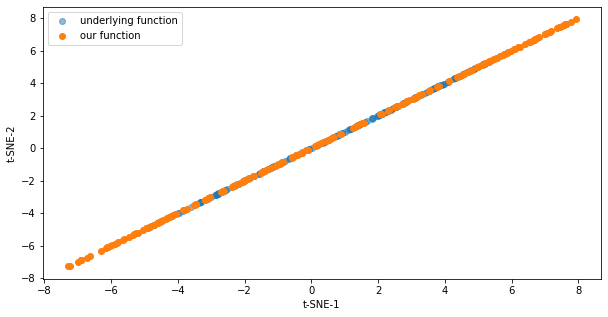

In [110]:
plot_tsne(x, y_true_tensor, model(x_tensor))